In [51]:
from pandas_datareader import DataReader
import matplotlib.pyplot as plt
import pandas as pd
import os 

In [52]:
os.getcwd()

'C:\\Users\\Amit\\Desktop\\SPRINGBOARD PROJECTS\\Chapter 7- Data wrangling\\Project-cap2'

In [53]:
folders = ['data','figures','models']
for folder in folders:
    os.makedirs(folder)

In [60]:
companies = ['AAPL', 'MSFT','SNE','GOOGL','HPQ']# Apples main competitors which include: microsoft,sony,google,hp 
start_date, end_date = '2010-01-01','2020-03-23'# a time line which allows for analysis prior to COVID-19, accordinf to https://www.scotsman.com/health/coronavirus/when-did-uk-lockdown-start-date-coronavirus-restrictions-were-enforced-and-if-government-should-have-acted-sooner-2844819
my_df = []


for company in companies:
    data = DataReader(company,'yahoo', start_date, end_date)
    data['company_name'] = company
    my_df.append(data)

df = pd.concat(my_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12860 entries, 2010-01-04 to 2020-03-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          12860 non-null  float64
 1   Low           12860 non-null  float64
 2   Open          12860 non-null  float64
 3   Close         12860 non-null  float64
 4   Volume        12860 non-null  float64
 5   Adj Close     12860 non-null  float64
 6   company_name  12860 non-null  object 
dtypes: float64(6), object(1)
memory usage: 753.5+ KB


In [77]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,12860.000000,12860.000000,12860.000000,12860.000000,1.286000e+04,12860.000000
mean,179.278504,176.114189,177.743196,177.750673,2.945755e+07,174.851270
std,295.347100,290.114105,292.794548,292.839918,4.055893e+07,293.962198
min,5.476839,5.154405,5.286104,5.317893,1.882000e+05,3.890207
25%,22.867501,22.362024,22.623044,22.586417,2.202300e+06,20.274245
50%,48.695000,47.849998,48.305000,48.291428,1.737725e+07,44.649017
75%,160.477501,157.544994,158.990005,158.814999,3.913625e+07,154.623447
max,1530.739990,1520.979980,1527.199951,1524.869995,4.702495e+08,1524.869995


In [66]:
adj_close = pd.pivot_table(df, index=['Date'],values=['Adj Close'],columns=['company_name'])
adj_close.columns = ['Apple','Google','Hp','Microsoft','Sony']
adj_close.head()





,Apple,Google,Hp,Microsoft,Sony
Date,,,,,
2010-01-04,26.466835,313.688690,15.928035,24.226894,27.184526
2010-01-05,26.512596,312.307312,15.994843,24.234720,27.057753
2010-01-06,26.090879,304.434448,15.846045,24.085989,27.030584
2010-01-07,26.042646,297.347351,15.852118,23.835503,26.985306
2010-01-08,26.215786,301.311310,15.970553,23.999893,27.537689


In [76]:
adj_close.describe()

,Apple,Google,Hp,Microsoft,Sony
count,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000
mean,107.760579,667.934321,13.460603,54.650495,30.450352
std,63.502207,342.588211,4.847973,38.389265,14.416323
min,23.751026,218.253250,3.890207,18.177536,9.132853
25%,57.351402,321.592834,9.842552,24.347116,18.870650
50%,92.905277,578.739319,12.811736,40.497635,27.437130
75%,149.548512,972.082520,17.295544,70.597198,37.984965
max,326.316681,1524.869995,24.885973,187.663330,72.725372


In [87]:
#take the rolling mean to smooth out the closing price for every 50 days
mavg = []

for column in adj_close.columns:
    com_mavg = adj_close[column].rolling(window=50).mean()
    mavg.append(com_mavg)
    
mavg_df = pd.concat(mavg, axis=1)


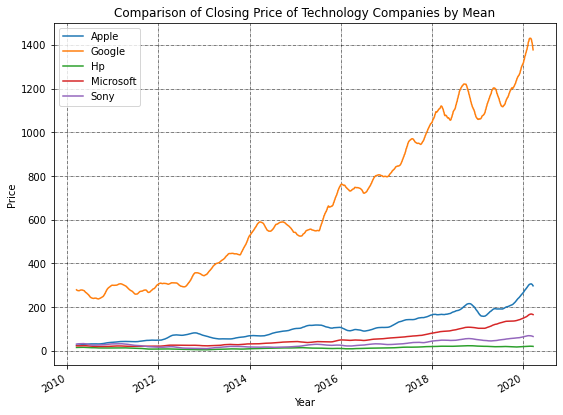

In [97]:
%matplotlib inline 
#adj_close_nago = adj_close.drop(['Google'],axis=1)
mavg_df.plot(figsize=(9,7))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.ylabel('Price')
plt.xlabel('Year')
plt.title('Comparison of Closing Price of Technology Companies by Mean')
plt.show()

In [101]:
os.getcwd()
os.chdir('C:\\Users\\Amit\\Desktop\\SPRINGBOARD PROJECTS\\Chapter 7- Data wrangling\\Project-cap2\\data')
os.getcwd()
mavg_df.to_csv('Moving_Average_Data.csv')
df.to_csv('Original_dataframe.csv')

